# Automate detection of different sentiments from textual comments and feedback.

In [15]:
!pip install wordcloud

## Importing requisite libraries

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline

## Downloading the dataframe from my Github Repository

# I am using Amazon Cell Phone review dataset from Kaggle.
https://www.kaggle.com/grikomsn/amazon-cell-phones-reviews?select=20191226-reviews.csv

In [28]:
df = pd.read_csv("https://raw.githubusercontent.com/farazkhanfk7/TensorFlow-Keras/master/NaturalLanguageProcessing/20191226-reviews.csv")
df.tail(10)

,asin,name,rating,date,verified,title,body,helpfulVotes
67976,B081H6STQQ,Eduardo T.,5,"August 11, 2019",True,Love it,Best phone from Sony so far,NaN
67977,B081H6STQQ,Dean,5,"July 23, 2019",True,that it works,"I love it for what I use it for, the battery l...",NaN
67978,B081H6STQQ,Rock Edge,5,"July 16, 2019",False,Candy bar phone is back!,Update 8/14/19 5 stars now! I've been using th...,12.0
67979,B081H6STQQ,Cindy Cowles,3,"July 17, 2019",False,Updated review,Update: If you like sending and receiving pict...,2.0
67980,B081H6STQQ,Los Kositos,5,"October 7, 2019",False,From iPhone to Android and loving it,I love my new phone. I've been dying to do a r...,1.0
67981,B081H6STQQ,jande,5,"August 16, 2019",False,"Awesome Phone, but finger scanner is a big mis...",I love the camera on this phone. The screen is...,1.0
67982,B081H6STQQ,2cool4u,5,"September 14, 2019",False,Simply Amazing!,I've been an Xperia user for several years and...,1.0
67983,B081H6STQQ,simon,5,"July 14, 2019",False,"great phon3, but many bugs need to fix. still ...",buy one more for my cousin,NaN
67984,B081TJFVCJ,Tobiasz Jedrysiak,5,"December 24, 2019",True,Phone is like new,Product looks and works like new. Very much re...,NaN
67985,B0825BB7SG,Owen Gonzalez,5,"December 11, 2019",False,Outstanding phone for the price,I love the size and style of this phone. It is...,NaN


## Countplot for all different numbers in rating. Here I have used Seaborn's countplot.

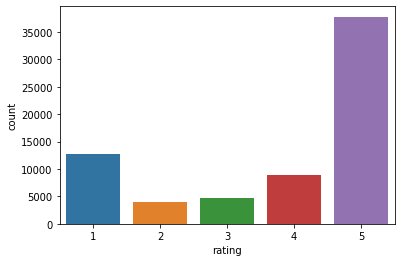

In [29]:
sns.countplot(df["rating"])

Counting total values of different ratings present.

In [30]:
df["rating"].value_counts()

5    37752
1    12743
4     8824
3     4752
2     3915
Name: rating, dtype: int64

Creating a function that gives a label of positive to all ratings that were more than 3 and similarly for negative.

In [31]:
def rate(x):
  if x>3:
    return "positive"
  elif x==3:
    return "neutral"
  else:
    return "negative"

Creating a new dataframe here with only reviews and their respective sentiments.

In [32]:
df["review"] = df["title"] + df["body"]
df["sentiment"] = df["rating"].apply(rate)

In [33]:
df = df[["review", "sentiment"]]
df.describe()

,review,sentiment
count,67956,67986
unique,62270,3
top,GoodGood,positive
freq,132,46576


In [34]:
#Droping the null values
df = df.dropna()

In [35]:
df.describe()

,review,sentiment
count,67956,67956
unique,62270,3
top,GoodGood,positive
freq,132,46553


In [36]:
#Checking the value count after dropping null values
df["sentiment"].value_counts()

positive    46553
negative    16651
neutral      4752
Name: sentiment, dtype: int64

In [37]:
df.head(10)

,review,sentiment
0,"Def not best, but not worstI had the Samsung A...",neutral
1,Text Messaging Doesn't WorkDue to a software i...,negative
2,"Love This PhoneThis is a great, reliable phone...",positive
3,"Love the Phone, BUT...!I love the phone and al...",neutral
4,"Great phone service and options, lousy case!Th...",positive
5,"Worked great for meHello, I have this phone an...",positive
6,Wanna cool Nokia? You have it here!Cool. Cheap...,positive
7,Problem with 3588i universal headsetThe 3599i ...,positive
8,cool phone!!!!!!!!I've never owned a Nokia pho...,positive
9,Pissed off-a little bitok well im in school an...,neutral


Again Seaborn's countplot for different sentiments present in my data.

Text(0.5, 1.0, 'Sentiment')

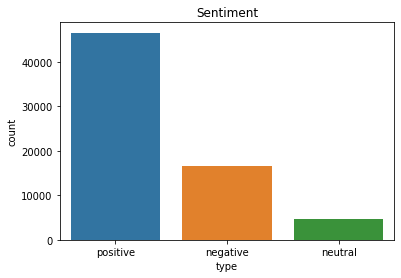

In [38]:
sns.countplot(
  x='sentiment',
  data=df,
  order=df.sentiment.value_counts().index
)

plt.xlabel("type")
plt.title("Sentiment")

## Now I'll be combining all texts from different sentiments to make a WordCloud of most common words present.

In [39]:
positive_review = df[df.sentiment == "positive"]
neutral_review = df[df.sentiment == "neutral"]
negative_review = df[df.sentiment == "negative"]

In [40]:
print(positive_review.shape,neutral_review.shape,negative_review.shape)

(46553, 2) (4752, 2) (16651, 2)


In [41]:
positive_list = []
neutral_list = []
negative_list = []

In [42]:
for index,row in df.iterrows():
  if row["sentiment"] == "positive":
    positive_list.append(row["review"])
  elif row["sentiment"] == "neutral":
    neutral_list.append(row["review"])
  elif row["sentiment"] == "negative":
    negative_list.append(row["review"])
  else:
    pass

In [43]:
positive_text = ''.join(str(v) for v in positive_list)
neutral_text = ''.join(str(v) for v in neutral_list)
negative_text = ''.join(str(v) for v in negative_list)

Creating wordcloud

In [44]:
good_reviews_cloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(positive_text)
neutral_reviews_cloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(neutral_text)
negative_reviews_cloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(negative_text)

In [45]:
#Function for plotting WordCloud
def show_word_cloud(cloud, title):
  plt.figure(figsize = (8, 5))
  plt.imshow(cloud, interpolation='bilinear')
  plt.title(title)
  plt.axis("off")
  plt.show()

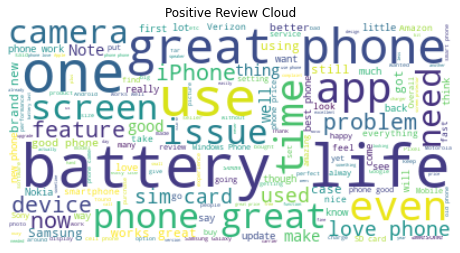

In [46]:
show_word_cloud(good_reviews_cloud,"Positive Review Cloud")

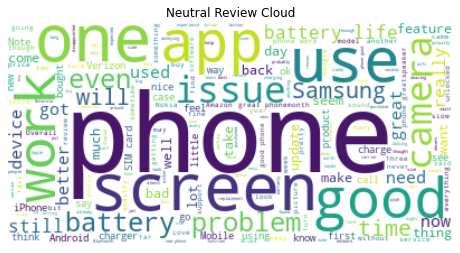

In [47]:
show_word_cloud(neutral_reviews_cloud,"Neutral Review Cloud")

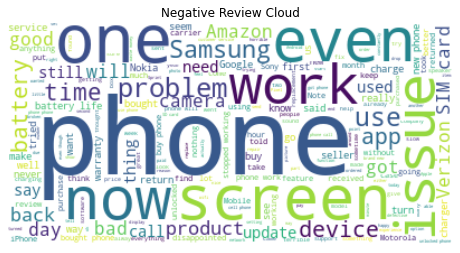

In [48]:
show_word_cloud(negative_reviews_cloud,"Negative Review Cloud")

## Now I have to remove stopwords from the review sentences.

In [49]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
stop_words = stopwords.words('english')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [50]:
#Sample text for checking if regular expression module and stopword filter is working fine.
x = "I love this,car"

Creating a function for Text Processing

In [51]:
def text_process(x):
  filtered_list = []
  text_tokens = word_tokenize(str(x))
  for w in text_tokens:
      if w not in stop_words:
          filtered_list.append(w)
  filtered_sentence = (" ").join(filtered_list)
  filtered_sentence = re.sub(r'[^\w]', ' ', filtered_sentence)
  filtered_sentence = re.sub(r"\d", "", filtered_sentence)
  return filtered_sentence

In [52]:
text_process(x)

'I love   car'

Now applying the text_process function over the review column in dataframe.

In [53]:
df['review'] = df['review'].apply(text_process)

In [54]:
df.describe()

,review,sentiment
count,67956,67956
unique,62057,3
top,GoodGood,positive
freq,132,46553


In [55]:
df.head(20)

,review,sentiment
0,Def best worstI Samsung A awhile absolute do...,neutral
1,Text Messaging Does n t WorkDue software issue...,negative
2,Love This PhoneThis great reliable phone I...,positive
3,Love Phone BUT I love phone I really...,neutral
4,Great phone service options lousy case The...,positive
5,Worked great meHello I phone used I decided ...,positive
6,Wan na cool Nokia You Cool Cheap Color...,positive
7,Problem i universal headsetThe i overall nice ...,positive
8,cool phone I ve never owned N...,positive
9,Pissed off a little bitok well im school need ...,neutral


In [56]:
#Again checking the value count.
df["sentiment"].value_counts()

positive    46553
negative    16651
neutral      4752
Name: sentiment, dtype: int64

# Train-Test Split using sklearn

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
y = df['sentiment']
X = df['review']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [59]:
print('Train data samples:', X_train.shape[0])
print('Test data samples:', X_test.shape[0])

Train data samples: 47569
Test data samples: 20387


# Using Tesorflow's Tokenizer and Pad_sequences to create word_index and padded sequences for review sentences.

In [60]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [76]:
num_word = 10000
embedding_dim = 48
max_length = 120
trunc_type='post'
padding_type='post'

In [62]:
#Using Tokenizer
tk = Tokenizer(num_words=num_word, oov_token= "<oov>")

In [63]:
tk.fit_on_texts(X_train)
tk.fit_on_texts(X_test)

In [64]:
word_index = tk.word_index
print(word_index)

{'<oov>': 1, 'i': 2, 'phone': 3, 't': 4, 's': 5, 'n': 6, 'the': 7, 'great': 8, 'good': 9, 'it': 10, 'battery': 11, 'screen': 12, 'one': 13, 'like': 14, 'new': 15, 'use': 16, 'would': 17, 'get': 18, 'camera': 19, 'this': 20, 'love': 21, 'works': 22, 'samsung': 23, 'phones': 24, 'price': 25, 'work': 26, 'really': 27, 'time': 28, 'even': 29, 'm': 30, 'buy': 31, 'life': 32, 'well': 33, 'back': 34, 'quality': 35, 'better': 36, 'got': 37, 'also': 38, 'five': 39, 'best': 40, 'apps': 41, 've': 42, 'still': 43, 'android': 44, 'sim': 45, 'iphone': 46, 'fast': 47, 'used': 48, 'card': 49, 'could': 50, 'bought': 51, 'much': 52, 'not': 53, 'day': 54, 'note': 55, 'verizon': 56, 'nice': 57, 'far': 58, 'product': 59, 'first': 60, 'came': 61, 'using': 62, 'device': 63, 'no': 64, 'need': 65, 'everything': 66, 'so': 67, 'unlocked': 68, 'galaxy': 69, 'charge': 70, 'g': 71, 'happy': 72, 'go': 73, 'amazon': 74, 'charger': 75, 'working': 76, 'want': 77, 'if': 78, 'my': 79, 'google': 80, 'months': 81, 'ca': 82

In [66]:
#Creating Sequences
X_train_seq = tk.texts_to_sequences(X_train)
X_test_seq = tk.texts_to_sequences(X_test)

In [67]:
#Adding padding after sequences so that all sequences are of equal length
X_train_padded = pad_sequences(X_train_seq,padding = "post",maxlen= max_length)
X_test_padded = pad_sequences(X_test_seq, padding = 'post', maxlen= max_length)

In [69]:
print(X_train_padded)
print('\n')
print(f' Length of padded sentence is {len(X_test_padded[0])}')

[[  20   40    3 ...    0    0    0]
 [  12   95  661 ...    0    0    0]
 [   3  752  421 ...    0    0    0]
 ...
 [   8 1448   19 ...    0    0    0]
 [5299   40  651 ...    0    0    0]
 [ 467 2684 2422 ...    0    0    0]]


 Length of padded sentence is 120


Creating Tokens for labels as well and then making an numpy array out of it.

In [70]:
ltk = Tokenizer()
ltk.fit_on_texts(y_train)

In [72]:
train_label_seq = np.array(ltk.texts_to_sequences(y_train))
print('**************')
print(train_label_seq)
test_label_seq = np.array(ltk.texts_to_sequences(y_test))
print('**************')
print(test_label_seq)

**************
[[1]
 [1]
 [2]
 ...
 [1]
 [1]
 [1]]
**************
[[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]


## Building the model using Keras layers

In [73]:
import tensorflow as tf

In [77]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_word, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 48)           480000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 48)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1568      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 198       
Total params: 481,766
Trainable params: 481,766
Non-trainable params: 0
_________________________________________________________________


Fitting testing and validation data in model over 20 epochs.

In [78]:
num_epochs = 20
h = model.fit(X_train_padded, train_label_seq, epochs=num_epochs, validation_data=(X_test_padded, test_label_seq), verbose=2, batch_size=256)

Epoch 1/20
186/186 - 2s - loss: 1.1107 - accuracy: 0.6595 - val_loss: 0.7728 - val_accuracy: 0.6854
Epoch 2/20
186/186 - 2s - loss: 0.7305 - accuracy: 0.7218 - val_loss: 0.6018 - val_accuracy: 0.7648
Epoch 3/20
186/186 - 2s - loss: 0.5722 - accuracy: 0.7964 - val_loss: 0.4792 - val_accuracy: 0.8312
Epoch 4/20
186/186 - 2s - loss: 0.4896 - accuracy: 0.8330 - val_loss: 0.4310 - val_accuracy: 0.8523
Epoch 5/20
186/186 - 2s - loss: 0.4435 - accuracy: 0.8496 - val_loss: 0.4091 - val_accuracy: 0.8599
Epoch 6/20
186/186 - 2s - loss: 0.4148 - accuracy: 0.8604 - val_loss: 0.3949 - val_accuracy: 0.8632
Epoch 7/20
186/186 - 2s - loss: 0.3958 - accuracy: 0.8680 - val_loss: 0.3875 - val_accuracy: 0.8643
Epoch 8/20
186/186 - 2s - loss: 0.3808 - accuracy: 0.8735 - val_loss: 0.3809 - val_accuracy: 0.8680
Epoch 9/20
186/186 - 2s - loss: 0.3650 - accuracy: 0.8778 - val_loss: 0.3776 - val_accuracy: 0.8684
Epoch 10/20
186/186 - 2s - loss: 0.3538 - accuracy: 0.8814 - val_loss: 0.3751 - val_accuracy: 0.8721

Here it has reached a testing accuracy of 0.9032 and validation accuracy of 0.8742 which is good. Also the difference is less which shows that data isn't overfitted.

## Plotting accuracy and validation accuracy graph 

Text(0.5, 1.0, 'Accurracy graph')

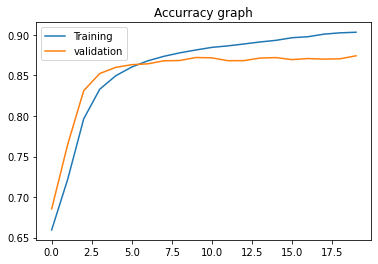

In [79]:
plt.plot(range(num_epochs), h.history['accuracy'], label ='Training')
plt.plot(range(num_epochs), h.history['val_accuracy'], label ='validation')
plt.legend()
plt.title('Accurracy graph')

Both lines are trying to follow each other which is a good sign and also it's not a case of overfitting

Plotting graph for loss and validation loss.

Text(0.5, 1.0, 'Loss graph')

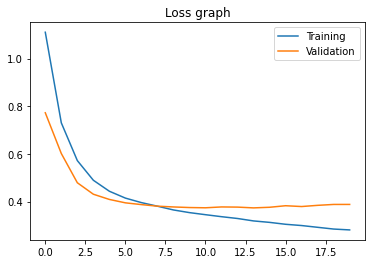

In [80]:
plt.plot(range(num_epochs), h.history['loss'], label = 'Training')
plt.plot(range(num_epochs), h.history['val_loss'], label = 'Validation')
plt.legend()
plt.title('Loss graph')

# Predictions

First creating a list so that we can get predicted sentiment class from it's token number.

In [81]:
label_classes = ltk.word_index
print(label_classes)

{'positive': 1, 'negative': 2, 'neutral': 3}


In [82]:
classlist = []
for key,value in label_classes.items():
  classlist.append(key)
print(classlist)

['positive', 'negative', 'neutral']


In [92]:
print("Actual sentences vs labels:")
for i in range(10):
  print(f'{y[i]}')

Actual sentences vs labels:
neutral
negative
positive
neutral
positive
positive
positive
positive
positive
neutral


## The Warning from tensorflow is expected because now we're using random sentences for testing our model's predictions and these sentences are not changed into padded sequences yet. So it'll give a warning that there is a difference in input layer of sentence and model's (None,120).

In [96]:
print("My model's predictions")
for j in range(10):
  sample_sentence_seq = tk.texts_to_sequences([X[j]])
  sample_padded_seq = pad_sequences(sample_sentence_seq)
  predicted_token = np.argmax(model.predict(sample_padded_seq))
  predicted_category = classlist[predicted_token-1]
  print(f'{predicted_category}')

My model's predictions
neutral
negative
positive
neutral
positive
positive
positive
positive
positive
neutral


# This Code block is for testing your own random sentences and checking and it's prediction.

In [95]:
sen = input("Enter a review sentence: ")
input_sentence_seq = tk.texts_to_sequences([sen])
input_padded_seq = pad_sequences(input_sentence_seq)
predicted_token = np.argmax(model.predict(input_padded_seq))
predicted_category = classlist[predicted_token-1]
print(f'Predicted Sentiment is {predicted_category}')

Enter a review sentence: Very bad phone,this was the worst phone i have ever bought display was great and better but again overall it is bad
Predicted Sentiment is negative
